In [32]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sb
sys.path.append('../../../..')
import bpdev as bd
import mutagenesisfunctions as mf
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


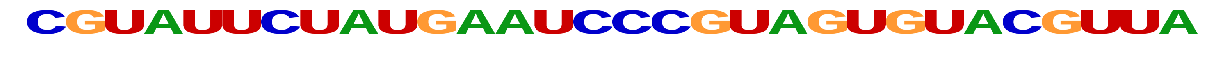

In [52]:
#Make sequence that matches structure
#each stem is 4 long

ol_A = 'CGU'
s1_A = 'AUUC'
il_A = 'UAU'
s1_B = 'GAAU'
ol_B = 'CC'
s2_A = 'CGUA'
il_B = 'GUG'
s2_B = 'UACG'
ol_C = 'UUA'

seq = ol_A + s1_A + il_A + s1_B + ol_B + s2_A + il_B +s2_B + ol_C
seqlen = len(seq)
seqhot = mf.seq_onehot([seq], alphabet='rna', gaps=False)

plt.figure(figsize=(17,2))
plt.imshow(visualize.seq_logo(seqhot[0].T, nt_width=100, alphabet='rna'))
plt.axis('off')
plt.savefig('seq.png')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


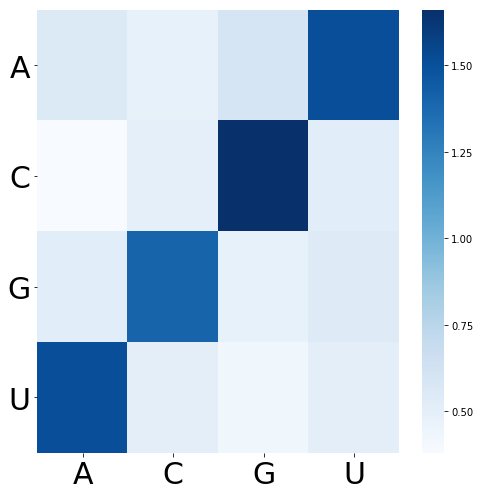

In [82]:
#Make toy SoM result by adding Poisson noise
np.random.seed(42)
som = np.zeros((4,4))
for i in range(4):
    som[i,i] = 1
som = som[::-1]

nuc = list('ACGU')

noise = []
for j in range(100):
    noise.append(som + np.random.poisson(lam=0.5,size=(4,4)))
som_n = np.mean(noise, axis=0)

plt.figure(figsize=(7,7))
g = sb.heatmap(som_n, cmap='Blues', cbar=True)
g.set_xticklabels(labels = nuc, fontsize= 30, rotation=0)
g.set_yticklabels(labels = nuc, fontsize= 30, rotation=0)
plt.savefig('toysom.png')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


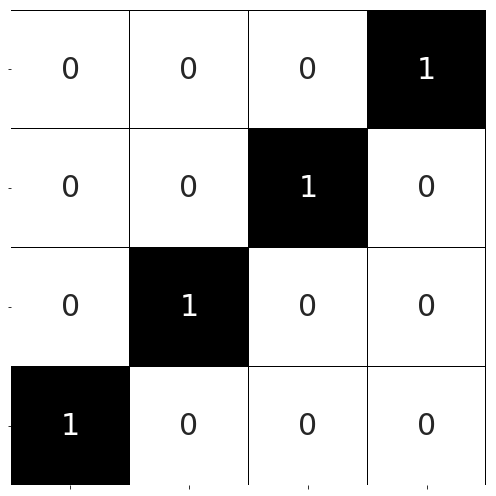

In [4]:
#Make filter pic
plt.figure(figsize=(7,7))
g = sb.heatmap(som, cmap='Greys', cbar=False, linewidths=0.5, linecolor='k', annot=True, annot_kws={"size": 30})
g.set_xticklabels(labels = [], fontsize= 30, rotation=0)
g.set_yticklabels(labels = [], fontsize= 30, rotation=0)
plt.savefig('filter.png')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


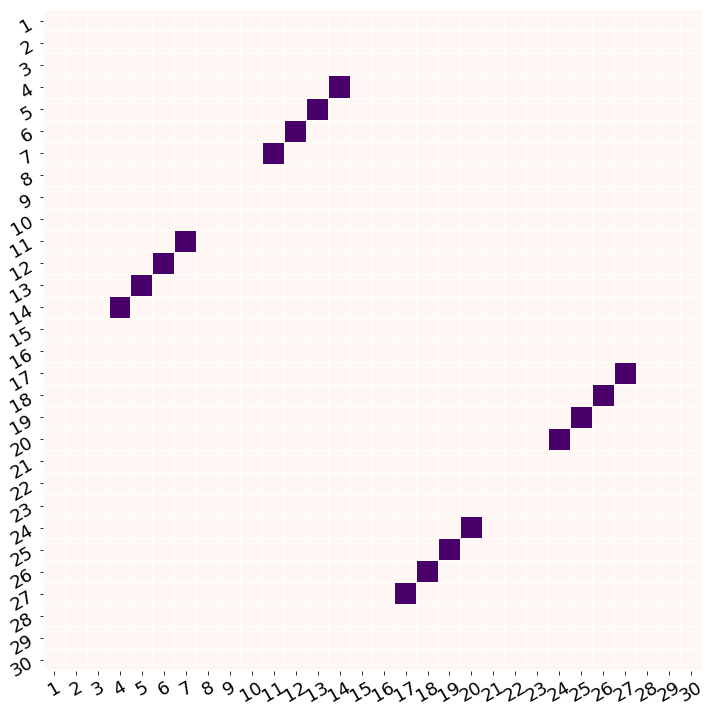

In [75]:
#Make toy WCplot
ugSS = '...<<<<...>>>>..<<<<...>>>>...'

s = bd.get_true(ugSS, numug=len(ugSS))

s_n = []
for j in range(100):
    s_n.append(s + np.random.poisson(lam=0.25,size=s.shape))
s_n = np.mean(s_n, axis=0)

#visualize in the same shape as a wc plot
plt.figure(figsize=(10,10))
g = sb.heatmap(s, vmin=0.4, cmap='RdPu', linewidth=0.01, linecolor='w', cbar=False)
g.set_xticklabels(labels = range(1,seqlen+1), fontsize= 18, rotation=30)
g.set_yticklabels(labels = range(1,seqlen+1), fontsize= 18, rotation=30)
plt.savefig('toywcplot.png')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


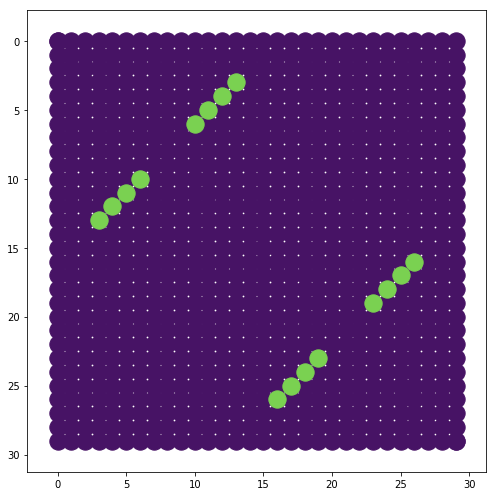

In [49]:
x,y = np.where(s == 1)
t = 300
vir = mat.cm.get_cmap('viridis')
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(np.tril_indices(30)[0], np.tril_indices(30)[1], cmap='viridis', s=t, c=np.asarray([vir(0.05)]))
ax1.scatter(np.triu_indices(30)[0], np.triu_indices(30)[1], cmap='viridis', s=t, c=np.asarray([vir(0.05)]))
ax1.scatter(x, y, cmap='viridis', s=t, c=np.asarray([vir(0.8)]))
plt.gca().invert_yaxis()
plt.show()